In [2]:
import pandas as pd
import numpy as np
from scipy import stats # for statistics like t-tests
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns # for making plots with seaborn
from matplotlib.ticker import FuncFormatter

In [3]:
# Import data (for Mac the "\\" might be replaced by "/")
cwd = os.getcwd()
data = pd.read_csv(cwd + "\\WA_Fn-UseC_-Sales-Win-Loss.csv", index_col = 0)

In [4]:
data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


Start by formatting variable names:

In [5]:
# Format variable names
names = list(data.columns)

for i in range(len(names)):
    names[i] = names[i].replace(" ", "")
    
# Rename selected variables
indeces = [
    4, 7, 8, 9,
    10, 11, 12, 
    14, 15, 16
    ]

names_update = [
    "DaysSales", "DaysClosing", "DaysQualified", "OpportunityAmount",
    "ClientRevenue", "ClientEmployees", "PastRevenue",
    "IdentifiedDaysRatio", "ValidatedDaysRatio", "QualifiedDaysRatio"
    ]

for ind, i in zip(indeces, range(len(indeces))):
    names[ind] = names_update[i]
    
data.columns = names

In [6]:
data.head()

,SuppliesSubgroup,SuppliesGroup,Region,RouteToMarket,DaysSales,OpportunityResult,SalesStageChangeCount,DaysClosing,DaysQualified,OpportunityAmount,ClientRevenue,ClientEmployees,PastRevenue,CompetitorType,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio,DealSizeCategory
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [7]:
# Remove all data with opportunity amount = 0
data = data[data.OpportunityAmount !=0]

### Some Univarate Plots

First, let's take a look at the opportunity amount won and lost:

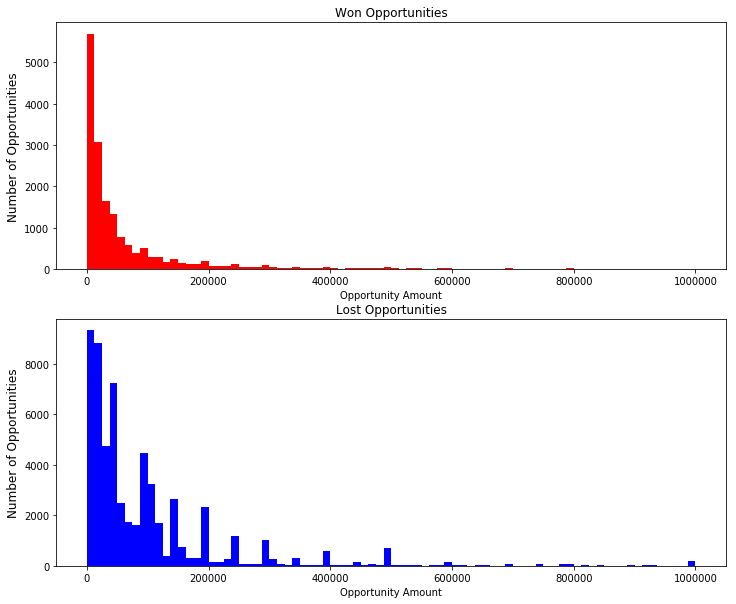

In [8]:
# Plot the distribution of Opportunity amount per Won/lost
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].hist(data[data["OpportunityResult"] == "Won"]["OpportunityAmount"], bins = 80, color = "r")
axs[0].set_title("Won Opportunities")
axs[0].set_ylabel("Number of Opportunities", size = 12)
axs[0].set_xlabel("Opportunity Amount")

axs[1].hist(data[data["OpportunityResult"] == "Loss"]["OpportunityAmount"], bins = 80, color = "b")
axs[1].set_title("Lost Opportunities")
axs[1].set_ylabel("Number of Opportunities", size = 12)
axs[1].set_xlabel("Opportunity Amount")

# axs = axs.ravel()
# for i in range(10):
#     axs[i].hist(lb[lb.CompetitionId == top.iloc[i, 0]].Cost, bins = 80)
#     axs[i].set_title(str(top.iloc[i, 1]))
#     axs[i].tick_params(axis='both', which='both', labelbottom=True)
#     axs[i].set_ylabel("Frequency", size = 12)
#     axs[i].set_xlabel("Cost")
plt.show()

Note that in the diagram above, the y-scales are not equal. To gain more insight on which opportunities are won depending on the opportunity amount, see the next chart:

In [9]:
#### Define a function for inserting percentage values showing the share of won and lost cases in each group

# Attach a text label above each won bar showing the percentage of won cases in each group

# won and loss are the underlying data for each group, won_bars and loss_bars are the bars itself
def perc_tick(won, lost, won_bars, loss_bars):
    # First compute percentage values
    # Intitialize variables
    w = []
    won_perc = []
    l = []
    lost_perc = []
    # For each value in the underlying value, compute its percentage on all the values in that group
    for i in range(len(won)):
        w = int(round(won[i] / (won[i] + lost[i]) * 100, 0))
        l = int(round(lost[i] / (won[i] + lost[i]) * 100, 0))
        won_perc.append(w)
        lost_perc.append(l)
    # Add the percentage values to the won bars and the lost bars
    for bar_won, bar_lost, i in zip(won_bars, lost_bars, range(len(won))):
        ax.text(bar_won.get_x() + bar_won.get_width() / 2,
                bar_won.get_height(),
                s = str(won_perc[i]) + " %",
                ha='center', va='bottom')
        ax.text(bar_lost.get_x() + bar_lost.get_width() / 2,
                bar_lost.get_height(),
                s = str(lost_perc[i]) + " %",
                ha='center', va='bottom')

In [10]:
# Define function for axis labels in million dollars
def millions(x, pos):
    return '$%1.1fM' % (x*1e-6)

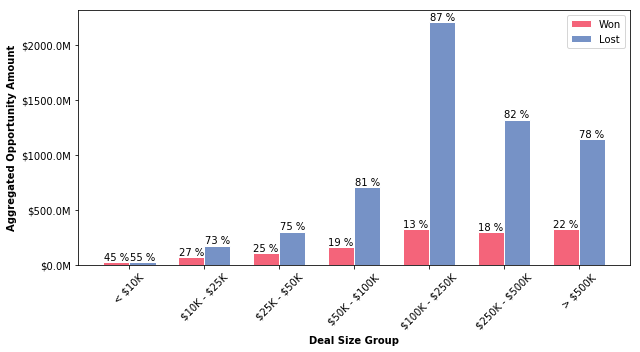

In [12]:
# Plot grouped bar chart for Opportunity Amount

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "DealSizeCategory"])["OpportunityAmount"].sum()["Won"].reset_index(drop = True)
lost = data.groupby(["OpportunityResult", "DealSizeCategory"])["OpportunityAmount"].sum()["Loss"].reset_index(drop = True)

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize = (9, 5))
won_bars = ax.bar(r1, won, color = "#F4647A", width = width, edgecolor = 'white', label = 'Won')
lost_bars = ax.bar(r2, lost, color = "#7692C6", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = ["< $10K", "\$10K - $25K", "\$25K - $50K", "\$50K - $100K", "\$100K - $250K", "\$250K - $500K", "> $500K"]
plt.xlabel("Deal Size Group", fontweight='bold')
plt.xticks((r1+r2)/2, groups, rotation = 45)

# Add yaxis label
plt.ylabel("Aggregated Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add percentage values above bars
perc_tick(won, lost, won_bars, lost_bars)
       
# Create legend & Show graphic
plt.legend()
plt.tight_layout()

# Save object
plt.savefig("opportunity_amount.eps")

We will start our exploratory analysis by taking a look at the distribution of sales opportunities won and lost across different deal sizes. Figure \ref{dealsize} shows that the company loses more sale opportunities than it wins over all groups of in the deal sizes. Even worse, of all deals with a volume of \$ 50,000 - $ 100,000 and \$ 100,000 - \$ 250,000 which make the largest groups in terms of their deal volume, the company wins the least opportunities in relative term (13\% and 18\%, respectively).



Next, we want to explore the relevance of past revenues. Both intuition and academic literature suggest, that on average it should be easier to win a tender with a client with whom a firm has made business in the past (insert references). Our dataset confirms this hypothesis with a win rate of 53.6 \% in the sales opportunities with revenue in the past, compared to a winrate of only 12.4 \% in sales opportunities where the company has no relationship to the customer. As a heuristic, this would suggest to focus mainly on those sales opportunities where there has been revenue in the past.

However, figures \ref{fig:sales_past_rev} shows that, (1) by far the biggest sales volume lies in cases without past revenues and (2) that even in those cases with past revenue, the share of won cases declines with the deal size. This is intuitive as competition for large sales volumes may be higher than for lower.

In [15]:
# Winrate of sales opportunities with past revenue
winr_pastr = data[(data.OpportunityResult == "Won") & (data.PastRevenue != 0)]["OpportunityAmount"].sum() / data[data.PastRevenue != 0]["OpportunityAmount"].sum()
winr_pastr = round(winr_pastr, 3)
winr_pastr

0.526

In [16]:
# Winrate without past revenue
winr_no_pastr = data[(data.OpportunityResult == "Won") & (data.PastRevenue == 0)]["OpportunityAmount"].sum() / data[data.PastRevenue == 0]["OpportunityAmount"].sum()
winr_no_pastr = round(winr_no_pastr, 3)
winr_no_pastr

0.124

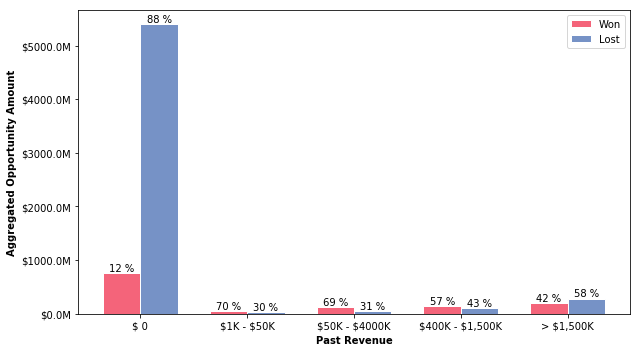

In [15]:
# Plot grouped bar chart for Opportunity Amount depending on past revenue

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "PastRevenue"])["OpportunityAmount"].sum()["Won"].reset_index(drop = True)
lost = data.groupby(["OpportunityResult", "PastRevenue"])["OpportunityAmount"].sum()["Loss"].reset_index(drop = True)

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(9,5))
won_bars = ax.bar(r1, won, color = "#F4647A", width = width, edgecolor = 'white', label = 'Won')
lost_bars = ax.bar(r2, lost, color = "#7692C6", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = ["\$ 0", "\$1K - $50K", "\$50K - $4000K", "\$400K - $1,500K", "> $1,500K"]
plt.xlabel("Past Revenue", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Aggregated Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add percentage values above bars
perc_tick(won, lost, won_bars, lost_bars)
       
# Create legend & Show graphic
plt.legend()
plt.tight_layout()

# Save object
plt.savefig("sales_past_rev.eps")

In [18]:
data.groupby(["CompetitorType", "OpportunityResult"])["OpportunityAmount"].sum()

CompetitorType  OpportunityResult
Known           Loss                 1378474950
                Won                   287052855
None            Loss                  564212968
                Won                   167280729
Unknown         Loss                 3921202668
                Won                   831773100
Name: OpportunityAmount, dtype: int64

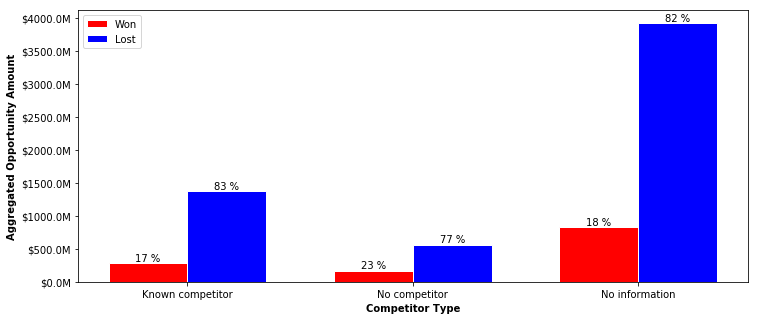

In [19]:
# Plot grouped bar chart for Opportunity Amount depending on Competitors

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "CompetitorType"])["OpportunityAmount"].sum()["Won"].reset_index(drop = True)
lost = data.groupby(["OpportunityResult", "CompetitorType"])["OpportunityAmount"].sum()["Loss"].reset_index(drop = True)

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
won_bars = ax.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
lost_bars = ax.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = ["Known competitor", "No competitor", "No information"]
plt.xlabel("Competitor Type", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Aggregated Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add percentage values above bars
perc_tick(won, lost, won_bars, lost_bars)
       
# Create legend & Show graphic
plt.legend()
plt.show()

The above figure does not provide a lot of information. In all categories, the company wins more or less the same share of sales opportunities. The most striking information is, that on most cases, there is no information available regarding competitors.